In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math 
from datetime import datetime 
import requests 
from dateutil.relativedelta import relativedelta 
from functools import reduce

In [2]:
data = pd.read_csv('Crypto data/Binance_AAVEUSDT_d.csv', skiprows=1)

In [3]:
data2 = pd.read_csv('Crypto data/Binance_ADAUSDT_d.csv', skiprows=1)

In [4]:
data3 = pd.read_csv('Crypto data/Binance_AVAXUSDT_d.csv', skiprows=1)

In [5]:
data4 = pd.read_csv('Crypto data/Binance_BNBUSDT_d (1).csv', skiprows=1)

In [6]:
data5 = pd.read_csv('Crypto data/Binance_BTCUSDT_d.csv', skiprows=1)

In [7]:
data6 = pd.read_csv('Crypto data/Binance_DOGEUSDT_d.csv', skiprows=1)

In [8]:
data7 = pd.read_csv('Crypto data/Binance_DOTUSDT_d.csv', skiprows=1)

In [9]:
data8 = pd.read_csv('Crypto data/Binance_ETHUSDT_d.csv', skiprows=1)

In [10]:
data9 = pd.read_csv('Crypto data/Binance_LINKUSDT_d.csv', skiprows=1)

In [11]:
data10 = pd.read_csv('Crypto data/Binance_LTCUSDT_d.csv', skiprows=1)

In [12]:
data11 = pd.read_csv('Crypto data/Binance_MANAUSDT_d.csv', skiprows=1)

In [13]:
data12 = pd.read_csv('Crypto data/Binance_MATICUSDT_d.csv', skiprows=1)

In [14]:
data13 = pd.read_csv('Crypto data/Binance_SOLUSDT_d.csv', skiprows=1)

In [15]:
data14 = pd.read_csv('Crypto data/Binance_TRXUSDT_d.csv', skiprows=1)

In [16]:
data15 = pd.read_csv('Crypto data/Binance_XRPUSDT_d.csv', skiprows=1)

In [17]:
datasets = [data, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15]

In [18]:
import pandas as pd

# Step 1: Put all datasets into a list
datasets = [data, data2, data3, data4, data5, data6, data7, data8, data9, data10,
            data11, data12, data13, data14, data15]

# Step 2: Ensure all datasets have the same set of columns (fill missing with NaN)
# This ensures that all 9 common + all unique columns are preserved
all_columns = set().union(*(df.columns for df in datasets))
datasets_aligned = [df.reindex(columns=all_columns) for df in datasets]

# Step 3: Concatenate all vertically (stack rows)
merged_data = pd.concat(datasets_aligned, ignore_index=True)

# Step 4: Optional — show basic info
print(merged_data.shape)
print(merged_data.columns)


(34483, 24)
Index(['Volume DOT', 'Low', 'Volume LINK', 'Volume SOL', 'Volume AAVE',
       'Volume BTC', 'Volume LTC', 'Volume MATIC', 'Volume USDT',
       'Volume DOGE', 'Volume BNB', 'Volume ETH', 'Volume TRX', 'Date',
       'Volume ADA', 'Unix', 'Open', 'Symbol', 'tradecount', 'High',
       'Volume MANA', 'Close', 'Volume AVAX', 'Volume XRP'],
      dtype='object')


In [19]:
import pandas as pd

# Step 1: Define the 9 common columns (in the order you want them)
common_cols = ['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume USDT', 'tradecount']

# Step 2: Put all your datasets into a list
datasets = [data, data2, data3, data4, data5, data6, data7, data8, data9, data10,
            data11, data12, data13, data14, data15]

# Step 3: For each dataset, keep only the common columns
cleaned_datasets = [df[common_cols] for df in datasets]

# Step 4: Concatenate all datasets row-wise
merged_data = pd.concat(cleaned_datasets, ignore_index=True)

# Step 5: (Optional) Check result
print(merged_data.shape)
print(merged_data.head())
merged_data.to_csv("new_crypto_data.csv", index=False)

(34483, 9)
            Unix        Date    Symbol    Open    High     Low   Close  \
0  1751414400000  2025-07-02  AAVEUSDT  259.95  283.43  257.37  276.16   
1  1751328000000  2025-07-01  AAVEUSDT  274.50  277.46  259.58  259.93   
2  1751241600000  2025-06-30  AAVEUSDT  278.61  284.86  268.51  274.48   
3  1751155200000  2025-06-29  AAVEUSDT  259.92  280.73  256.38  278.61   
4  1751068800000  2025-06-28  AAVEUSDT  259.29  261.90  253.12  259.92   

    Volume USDT  tradecount  
0  4.862339e+07      206776  
1  2.704804e+07      130461  
2  4.257807e+07      195238  
3  3.915352e+07      219206  
4  1.520894e+07      101745  


In [20]:
merged_data.describe()

,Unix,Open,High,Low,Close,Volume USDT,tradecount
count,3.448300e+04,34483.000000,34483.000000,34483.000000,34483.000000,3.448300e+04,3.448300e+04
mean,1.748446e+12,2788.528174,2853.956575,2718.499601,2791.655830,3.405091e+08,4.654062e+05
std,1.332311e+13,11696.106532,11944.201153,11434.943764,11710.039638,8.580026e+08,9.813199e+05
min,1.502928e+12,0.001497,0.001643,0.000100,0.001582,6.364172e+04,4.890000e+02
25%,1.600646e+12,0.393550,0.407785,0.379875,0.393760,2.119095e+07,6.105850e+04
50%,1.650499e+12,12.340000,12.813200,11.830000,12.350000,6.498444e+07,1.502180e+05
75%,1.700093e+12,149.955000,155.430000,143.890000,150.090000,2.402409e+08,4.175015e+05
max,1.751069e+15,111696.220000,111980.000000,109177.370000,111696.210000,1.759856e+10,1.672892e+07


In [21]:
md = pd.read_csv('Crypto data/new_crypto_data.csv')
md

,Unix,Date,Symbol,Open,High,Low,Close,Volume USDT,tradecount
0,1751414400000,2025-07-02,AAVEUSDT,259.95000,283.43000,257.37000,276.16000,4.862339e+07,206776
1,1751328000000,2025-07-01,AAVEUSDT,274.50000,277.46000,259.58000,259.93000,2.704804e+07,130461
2,1751241600000,2025-06-30,AAVEUSDT,278.61000,284.86000,268.51000,274.48000,4.257807e+07,195238
3,1751155200000,2025-06-29,AAVEUSDT,259.92000,280.73000,256.38000,278.61000,3.915352e+07,219206
4,1751068800000,2025-06-28,AAVEUSDT,259.29000,261.90000,253.12000,259.92000,1.520894e+07,101745
...,...,...,...,...,...,...,...,...,...
34478,1525737600000,2018-05-08,XRPUSDT,0.82490,0.84802,0.79200,0.80667,1.057184e+07,23010
34479,1525651200000,2018-05-07,XRPUSDT,0.86482,0.86886,0.80000,0.82490,1.419228e+07,29174
34480,1525564800000,2018-05-06,XRPUSDT,0.90280,0.91800,0.83774,0.86483,1.399714e+07,28713
34481,1525478400000,2018-05-05,XRPUSDT,0.88980,0.93500,0.88800,0.90280,1.528200e+07,26476


In [22]:
md['Date'] = pd.to_datetime(md['Date'], errors='coerce')
md['Year'] = md['Date'].dt.year

In [23]:
md.describe()

,Unix,Date,Open,High,Low,Close,Volume USDT,tradecount,Year
count,3.448300e+04,34483,34483.000000,34483.000000,34483.000000,34483.000000,3.448300e+04,3.448300e+04,34483.000000
mean,1.748446e+12,2022-03-11 08:10:58.132993024,2788.528174,2853.956575,2718.499601,2791.655830,3.405091e+08,4.654062e+05,2021.695792
min,1.502928e+12,2017-08-17 00:00:00,0.001497,0.001643,0.000100,0.001582,6.364172e+04,4.890000e+02,2017.000000
25%,1.600646e+12,2020-09-21 00:00:00,0.393550,0.407785,0.379875,0.393760,2.119095e+07,6.105850e+04,2020.000000
50%,1.650499e+12,2022-04-21 00:00:00,12.340000,12.813200,11.830000,12.350000,6.498444e+07,1.502180e+05,2022.000000
75%,1.700093e+12,2023-11-16 00:00:00,149.955000,155.430000,143.890000,150.090000,2.402409e+08,4.175015e+05,2023.000000
max,1.751069e+15,2025-07-03 00:00:00,111696.220000,111980.000000,109177.370000,111696.210000,1.759856e+10,1.672892e+07,2025.000000
std,1.332311e+13,NaN,11696.106532,11944.201153,11434.943764,11710.039638,8.580026e+08,9.813199e+05,2.035051


In [24]:
md.isnull().sum()

Unix           0
Date           0
Symbol         0
Open           0
High           0
Low            0
Close          0
Volume USDT    0
tradecount     0
Year           0
dtype: int64

# finding the top currencies by tradecount

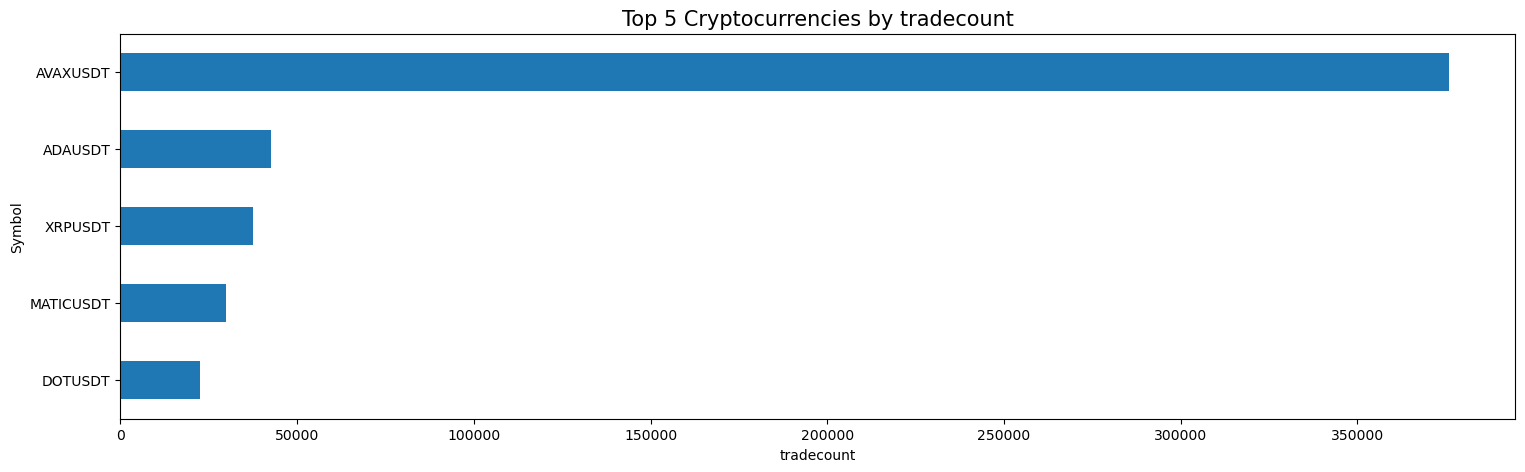

In [25]:
plt.figure(figsize=(18,5))
ax = md.groupby(['Symbol'])['tradecount'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("tradecount")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by tradecount", fontsize=15)
plt.show()

# finding which currency performed best and which year 

In [26]:
md.columns

Index(['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume USDT',
       'tradecount', 'Year'],
      dtype='object')

In [27]:
md.describe()

,Unix,Date,Open,High,Low,Close,Volume USDT,tradecount,Year
count,3.448300e+04,34483,34483.000000,34483.000000,34483.000000,34483.000000,3.448300e+04,3.448300e+04,34483.000000
mean,1.748446e+12,2022-03-11 08:10:58.132993024,2788.528174,2853.956575,2718.499601,2791.655830,3.405091e+08,4.654062e+05,2021.695792
min,1.502928e+12,2017-08-17 00:00:00,0.001497,0.001643,0.000100,0.001582,6.364172e+04,4.890000e+02,2017.000000
25%,1.600646e+12,2020-09-21 00:00:00,0.393550,0.407785,0.379875,0.393760,2.119095e+07,6.105850e+04,2020.000000
50%,1.650499e+12,2022-04-21 00:00:00,12.340000,12.813200,11.830000,12.350000,6.498444e+07,1.502180e+05,2022.000000
75%,1.700093e+12,2023-11-16 00:00:00,149.955000,155.430000,143.890000,150.090000,2.402409e+08,4.175015e+05,2023.000000
max,1.751069e+15,2025-07-03 00:00:00,111696.220000,111980.000000,109177.370000,111696.210000,1.759856e+10,1.672892e+07,2025.000000
std,1.332311e+13,NaN,11696.106532,11944.201153,11434.943764,11710.039638,8.580026e+08,9.813199e+05,2.035051


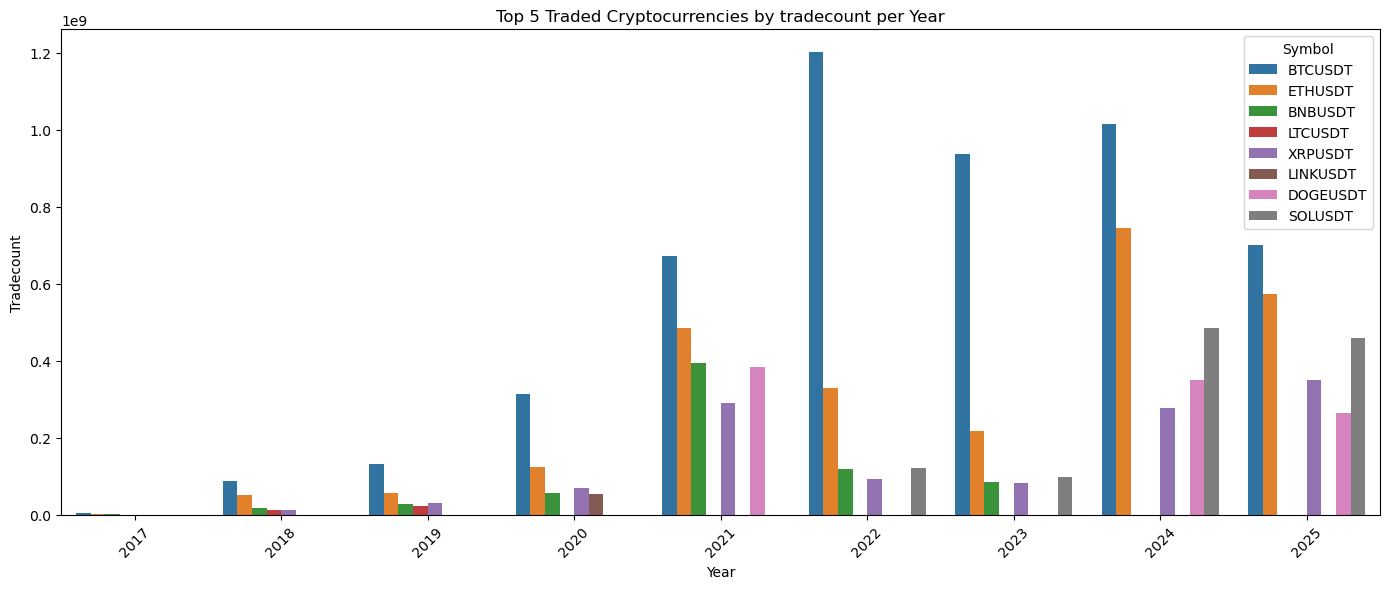

In [28]:
grouped = md.groupby(['Year', 'Symbol'])['tradecount'].sum().reset_index()

top5_per_year = grouped.sort_values(['Year', 'tradecount'], ascending=[True, False])
top5_per_year = top5_per_year.groupby('Year').head(5)

plt.figure(figsize=(14, 6))
sns.barplot(data=top5_per_year, x='Year', y='tradecount', hue='Symbol')
plt.title("Top 5 Traded Cryptocurrencies by tradecount per Year")
plt.ylabel("Tradecount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize how trading volume changed anually 

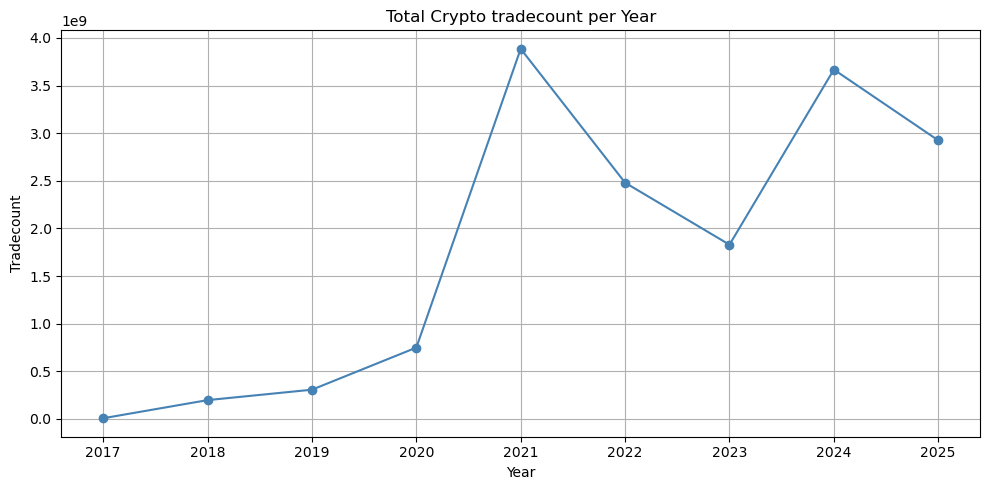

In [29]:
volume_per_year = md.groupby('Year')['tradecount'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(volume_per_year['Year'], volume_per_year['tradecount'], marker='o', color='steelblue')
plt.title("Total Crypto tradecount per Year")
plt.xlabel("Year")
plt.ylabel("Tradecount")
plt.grid(True)
plt.tight_layout()
plt.show()


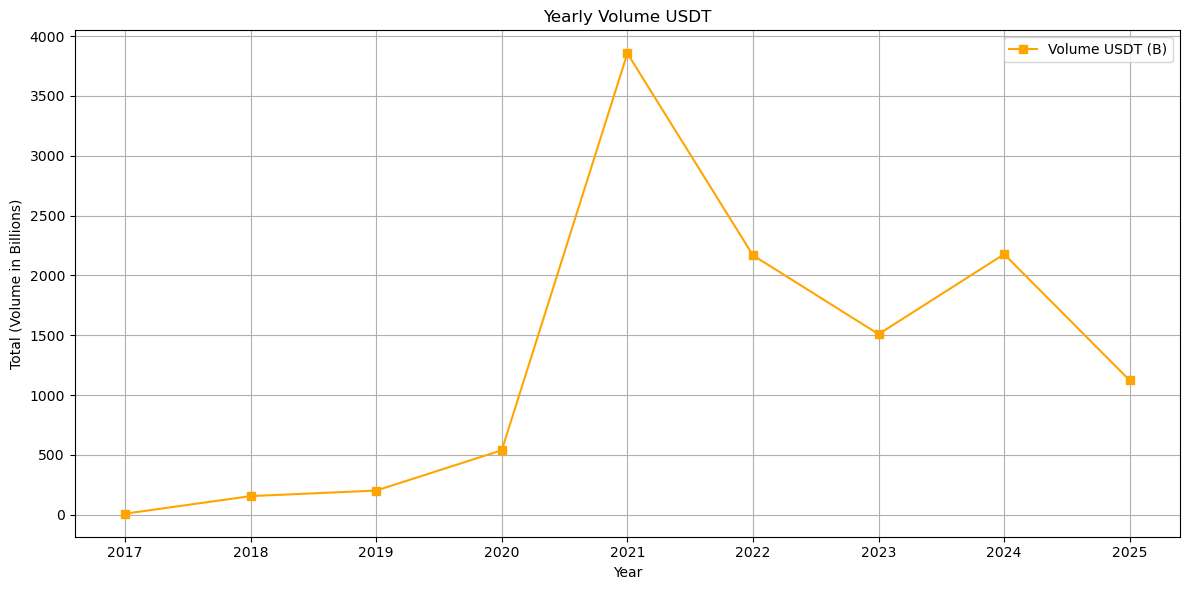

In [30]:
yearly_stats = md.groupby('Year')[ 'Volume USDT'].sum().reset_index()

# Optional: Scale Volume for better visual comparison
yearly_stats['Volume USDT (Billion)'] = yearly_stats['Volume USDT'] / 1e9

# Plot both as lines
plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['Year'], yearly_stats['Volume USDT (Billion)'], marker='s', label='Volume USDT (B)', color='orange')

plt.title("Yearly Volume USDT")
plt.xlabel("Year")
plt.ylabel("Total (Volume in Billions)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


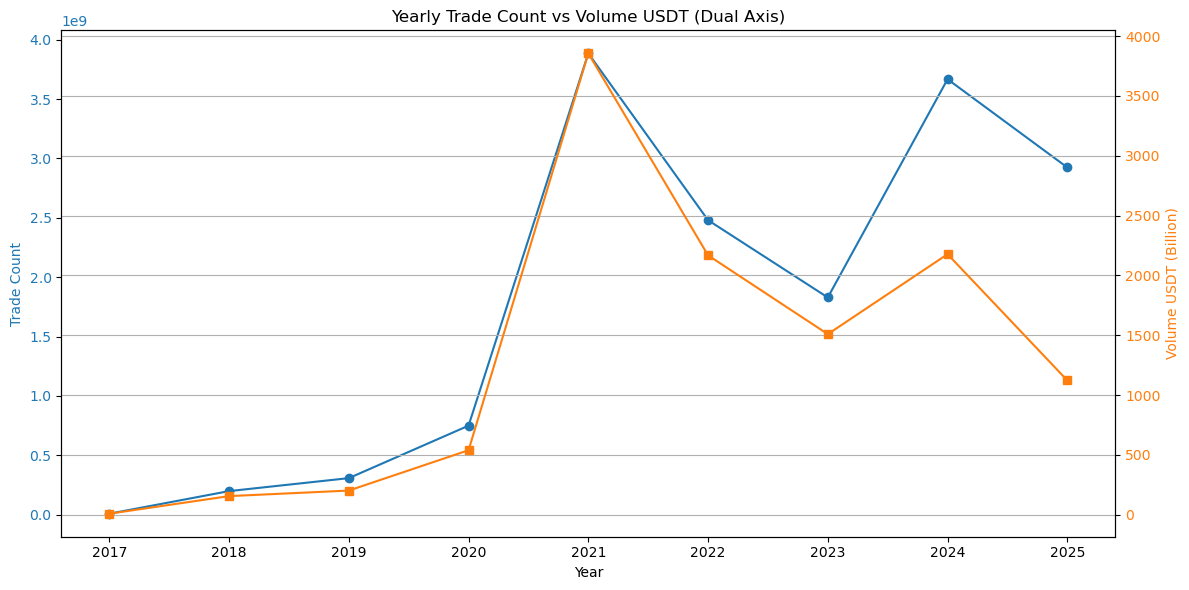

In [31]:
# Ensure numeric types
md['Volume USDT'] = pd.to_numeric(md['Volume USDT'], errors='coerce')
md['tradecount'] = pd.to_numeric(md['tradecount'], errors='coerce')

# Group by year
yearly = md.groupby('Year')[['Volume USDT', 'tradecount']].sum().reset_index()

# Plot with two Y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: Trade Count
color1 = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Trade Count', color=color1)
ax1.plot(yearly['Year'], yearly['tradecount'], marker='o', color=color1, label='Trade Count')
ax1.tick_params(axis='y', labelcolor=color1)

# Right Y-axis: Volume USDT
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Volume USDT (Billion)', color=color2)
ax2.plot(yearly['Year'], yearly['Volume USDT'] / 1e9, marker='s', color=color2, label='Volume USDT (B)')
ax2.tick_params(axis='y', labelcolor=color2)

# Title and layout
plt.title("Yearly Trade Count vs Volume USDT (Dual Axis)")
fig.tight_layout()
plt.grid(True)
plt.show()

## WHAT IS THE HIGHEST CLOSE PRICE 

In [32]:
max_close = md['Close'].max()
print(f"Highest Close price: {max_close}")

Highest Close price: 111696.21


In [33]:
min_close = md['Close'].min()
print(f"Lowest Close price: {min_close}")


Lowest Close price: 0.0015817


## WHAT MONTH HAD THE HIGHEST TRADES

In [34]:

# Extract month name or number
md['Month'] = md['Date'].dt.month_name()  # Or use dt.month for numeric months

#Grou p by Month and calculate average Volume
monthly_avg_volume = md.groupby('Month')['Volume USDT'].mean().sort_values(ascending=False)

# Display result
print("Average Volume USDT by Month:")
print(monthly_avg_volume)

# Get the month with highest average volume
highest_month = monthly_avg_volume.idxmax()
highest_value = monthly_avg_volume.max()
print(f"\n📈 Month with highest average volume: {highest_month} ({highest_value:,.2f} USDT)")

Average Volume USDT by Month:
Month
May          4.426821e+08
March        4.253795e+08
February     4.226134e+08
November     3.865136e+08
April        3.843460e+08
January      3.709068e+08
December     3.315110e+08
June         2.778748e+08
September    2.746620e+08
August       2.711575e+08
October      2.511128e+08
July         2.338177e+08
Name: Volume USDT, dtype: float64

📈 Month with highest average volume: May (442,682,091.96 USDT)


## Average Monthly Volume 

Highest-volume month in each year:
    Year      Month   Volume USDT
1   2017   December  7.411725e+09
8   2018   February  1.776312e+10
23  2019       June  3.043612e+10
31  2020   December  1.102642e+11
49  2021        May  6.987562e+11
64  2022  September  2.526073e+11
72  2023      March  2.958077e+11
79  2024   December  3.363208e+11
91  2025    January  2.651791e+11


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


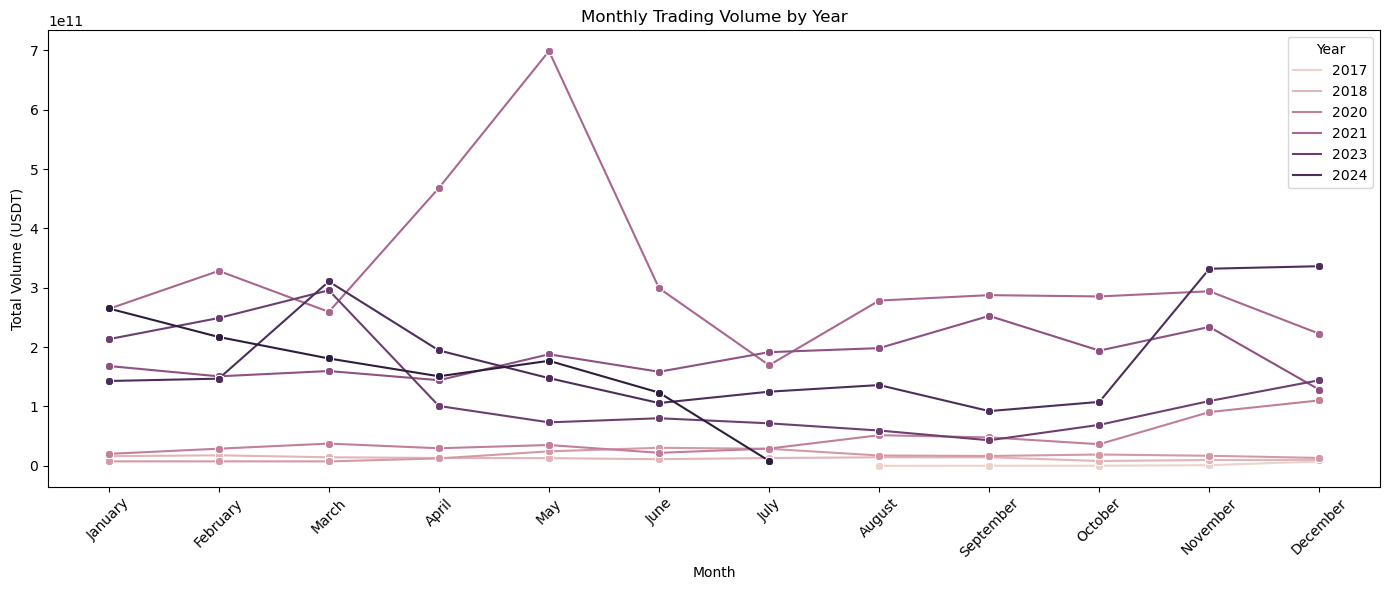

In [35]:
md['Year'] = md['Date'].dt.year
md['Month'] = md['Date'].dt.month_name()

# Group by Year and Month, and calculate total Volume
monthly_volume = md.groupby(['Year', 'Month'])['Volume USDT'].sum().reset_index()

# Optional: sort months correctly (January–December)
from pandas.api.types import CategoricalDtype
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_cat = CategoricalDtype(categories=month_order, ordered=True)
monthly_volume['Month'] = monthly_volume['Month'].astype(month_cat)

# Sort for plotting
monthly_volume = monthly_volume.sort_values(['Year', 'Month'])

# Find the month with highest volume per year
idx = monthly_volume.groupby('Year')['Volume USDT'].idxmax()
highest_months = monthly_volume.loc[idx]

print("Highest-volume month in each year:")
print(highest_months)

# Plot all months' volumes per year
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_volume, x='Month', y='Volume USDT', hue='Year', marker='8')
plt.title("Monthly Trading Volume by Year")
plt.ylabel("Total Volume (USDT)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Yearly Trade Count of All Currencies

Yearly Trade Count of All Currencies:
   Year   Symbol  tradecount
0  2017  BNBUSDT      716583
1  2017  BTCUSDT     4261621
2  2017  ETHUSDT     2545942
3  2017  LTCUSDT      317072
4  2018  ADAUSDT     9462347
5  2018  BNBUSDT    17019365
6  2018  BTCUSDT    87349954
7  2018  ETHUSDT    52200569
8  2018  LTCUSDT    13126707
9  2018  TRXUSDT     6751173


<Figure size 1400x600 with 0 Axes>

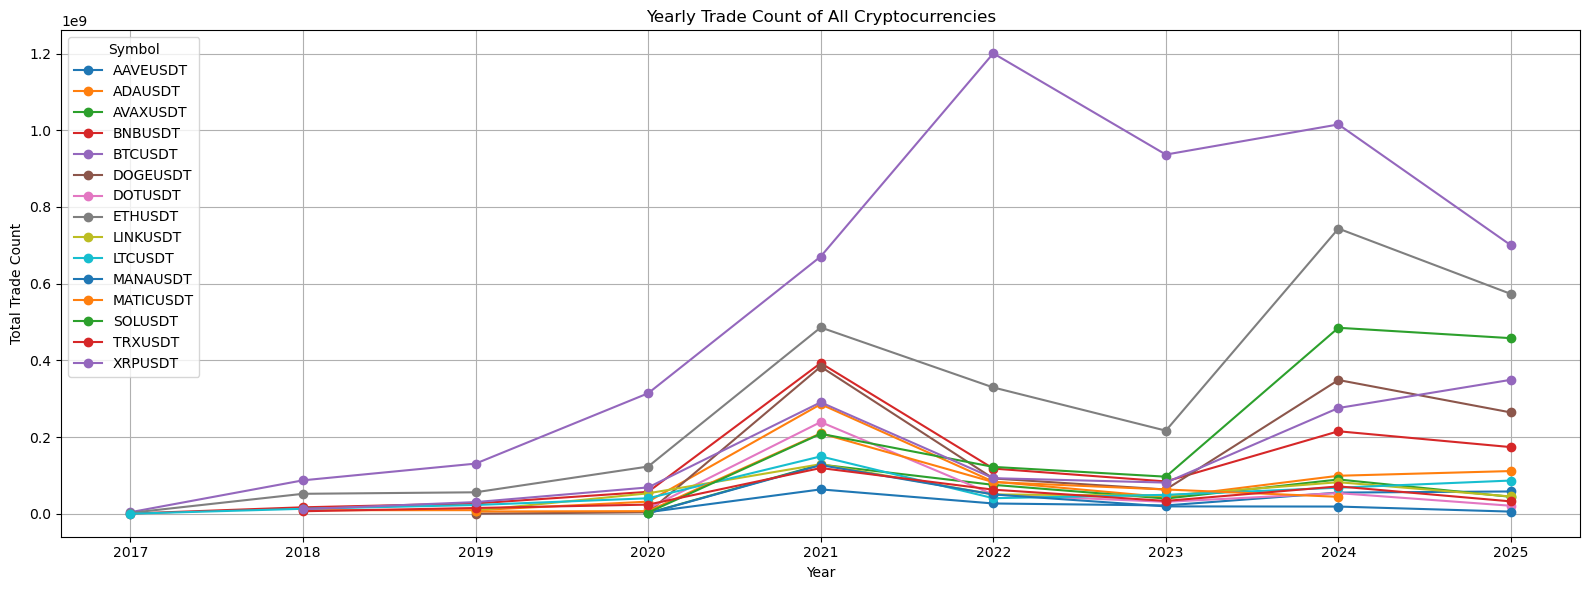

In [36]:
md['Year'] = md['Date'].dt.year

# Ensure 'tradecount' is numeric
md['tradecount'] = pd.to_numeric(md['tradecount'], errors='coerce')

# Group by Year and Symbol
yearly_tradecount = md.groupby(['Year', 'Symbol'])['tradecount'].sum().reset_index()

# Display or print
print("Yearly Trade Count of All Currencies:")
print(yearly_tradecount.head(10))

# Pivot for easier plotting
pivot_df = yearly_tradecount.pivot(index='Year', columns='Symbol', values='tradecount')

# Lineplot for all currencies over years
plt.figure(figsize=(14, 6))
pivot_df.plot(marker='o', figsize=(16, 6))
plt.title("Yearly Trade Count of All Cryptocurrencies")
plt.ylabel("Total Trade Count")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
pip install pycoingecko

Note: you may need to restart the kernel to use updated packages.


In [38]:
!pip install pycoingecko

In [39]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

# Initialize API client
cg = CoinGeckoAPI()

In [40]:
# Get market data for top 10 coins by market cap
data = cg.get_coins_markets(vs_currency='usd', per_page=10, page=1)

# Convert to DataFrame
dfn = pd.DataFrame(data)

# Display some useful columns
print(dfn[['id', 'symbol', 'name', 'current_price', 'market_cap', 'total_volume']])

             id symbol               name  current_price     market_cap  \
0       bitcoin    btc            Bitcoin  121764.000000  2421818114404   
1      ethereum    eth           Ethereum    3046.580000   367833912742   
2        ripple    xrp                XRP       2.960000   175121735061   
3        tether   usdt             Tether       1.000000   159538456172   
4   binancecoin    bnb                BNB     704.130000   102745779857   
5        solana    sol             Solana     166.850000    89469101136   
6      usd-coin   usdc               USDC       0.999805    63376068924   
7      dogecoin   doge           Dogecoin       0.205840    30892789204   
8          tron    trx               TRON       0.302849    28700709701   
9  staked-ether  steth  Lido Staked Ether    3042.330000    27787355872   

   total_volume  
0   58009496474  
1   36151732390  
2    9957775163  
3  126718153921  
4    1734408096  
5   12832076604  
6    7919712669  
7    7251385212  
8    2143926

In [41]:
dfn.head(10)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,121764.000000,2421818114404,1,2421818114404,58009496474,122838.000000,...,1.989221e+07,2.100000e+07,122838.000000,-0.91502,2025-07-14T07:56:01.937Z,67.810000,1.793953e+05,2013-07-06T00:00:00.000Z,None,2025-07-14T12:30:50.579Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3046.580000,367833912742,2,367833912742,36151732390,3074.130000,...,1.207150e+08,NaN,4878.260000,-37.48380,2021-11-10T14:24:19.604Z,0.432979,7.042538e+05,2015-10-20T00:00:00.000Z,"{'times': 32.45122841423776, 'currency': 'btc'...",2025-07-14T12:30:51.979Z
2,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.960000,175121735061,3,296114173729,9957775163,3.000000,...,9.998595e+10,1.000000e+11,3.400000,-12.31475,2018-01-07T00:00:00.000Z,0.002686,1.108349e+05,2014-05-22T00:00:00.000Z,None,2025-07-14T12:30:47.458Z
3,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.000000,159538456172,4,159538456172,126718153921,1.000000,...,1.595302e+11,NaN,1.320000,-24.41608,2018-07-24T00:00:00.000Z,0.572521,7.467433e+01,2015-03-02T00:00:00.000Z,None,2025-07-14T12:30:48.611Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,704.130000,102745779857,5,102745779857,1734408096,706.950000,...,1.458876e+08,2.000000e+08,788.840000,-10.69191,2024-12-04T10:35:25.220Z,0.039818,1.769217e+06,2017-10-19T00:00:00.000Z,None,2025-07-14T12:30:50.189Z
5,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,166.850000,89469101136,6,100986407362,12832076604,167.920000,...,6.051747e+08,NaN,293.310000,-43.07252,2025-01-19T11:15:27.957Z,0.500801,3.324160e+04,2020-05-11T19:35:23.449Z,None,2025-07-14T12:30:54.839Z
6,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,0.999805,63376068924,7,63379517832,7919712669,0.999914,...,6.339169e+10,NaN,1.170000,-14.74342,2019-05-08T00:40:28.300Z,0.877647,1.391933e+01,2023-03-11T08:02:13.981Z,None,2025-07-14T12:30:48.905Z
7,dogecoin,doge,Dogecoin,https://coin-images.coingecko.com/coins/images...,0.205840,30892789204,8,30895924256,7251385212,0.208932,...,1.500916e+11,NaN,0.731578,-71.83088,2021-05-08T05:08:23.458Z,0.000087,2.370349e+05,2015-05-06T00:00:00.000Z,None,2025-07-14T12:30:51.138Z
8,tron,trx,TRON,https://coin-images.coingecko.com/coins/images...,0.302849,28700709701,9,28700765089,2143926827,0.304879,...,9.475999e+10,NaN,0.431288,-29.73752,2024-12-04T00:10:40.323Z,0.001804,1.669471e+04,2017-11-12T00:00:00.000Z,"{'times': 158.39422434016285, 'currency': 'usd...",2025-07-14T12:30:48.525Z
9,staked-ether,steth,Lido Staked Ether,https://coin-images.coingecko.com/coins/images...,3042.330000,27787355872,10,27787355872,32041071,3072.940000,...,9.128686e+06,NaN,4829.570000,-36.99150,2021-11-10T14:40:47.256Z,482.900000,5.301644e+02,2020-12-22T04:08:21.854Z,None,2025-07-14T12:30:54.600Z


In [42]:
dfn.to_csv('my_dataset.csv', index=False)

In [46]:
df = pd.read_csv("Datasets/my_dataset.csv")

In [50]:
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,121764.00,2421818114404,1,2421818114404,58009496474,122838.00,...,1.989221e+07,2.100000e+07,122838.00,-0.91502,2025-07-14T07:56:01.937Z,67.810000,1.793953e+05,2013-07-06T00:00:00.000Z,NaN,2025-07-14T12:30:50.579Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,3046.58,367833912742,2,367833912742,36151732390,3074.13,...,1.207150e+08,NaN,4878.26,-37.48380,2021-11-10T14:24:19.604Z,0.432979,7.042538e+05,2015-10-20T00:00:00.000Z,"{'times': 32.45122841423776, 'currency': 'btc'...",2025-07-14T12:30:51.979Z
2,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.96,175121735061,3,296114173729,9957775163,3.00,...,9.998595e+10,1.000000e+11,3.40,-12.31475,2018-01-07T00:00:00.000Z,0.002686,1.108349e+05,2014-05-22T00:00:00.000Z,NaN,2025-07-14T12:30:47.458Z
3,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.00,159538456172,4,159538456172,126718153921,1.00,...,1.595302e+11,NaN,1.32,-24.41608,2018-07-24T00:00:00.000Z,0.572521,7.467433e+01,2015-03-02T00:00:00.000Z,NaN,2025-07-14T12:30:48.611Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,704.13,102745779857,5,102745779857,1734408096,706.95,...,1.458876e+08,2.000000e+08,788.84,-10.69191,2024-12-04T10:35:25.220Z,0.039818,1.769217e+06,2017-10-19T00:00:00.000Z,NaN,2025-07-14T12:30:50.189Z


### What is the all time high of BTC/ETH

In [54]:
# filter for BTC 
btc_max = df[df['symbol'].str.lower() == 'btc']  # or df[df['id'] == 'bitcoin']

# Get the ATH
btc_ath = btc_max['ath'].values[0]

# get the ATH date too
btc_ath_date = btc_max['ath_date'].values[0]

print(f"Bitcoin All-Time High: ${btc_ath}")
print(f"Date of ATH: {btc_ath_date}")

Bitcoin All-Time High: $122838.0
Date of ATH: 2025-07-14T07:56:01.937Z


In [59]:
# filter for ETH
eth_max = df[df['symbol'].str.lower() == 'eth'] 

# Get the ATH
eth_ath = eth_max['ath'].values[0]

# get the ATH date too
eth_ath_date = eth_max['ath_date'].values[0]

print(f"Ethereum All-Time High: ${eth_ath}")
print(f"Date of ATH: {eth_ath_date}")

Ethereum All-Time High: $4878.26
Date of ATH: 2021-11-10T14:24:19.604Z


### What is the all time low price for BTC/ETH

In [64]:
# filter for BTC 
btc_min = df[df['symbol'].str.lower() == 'btc'] 

# Get the ATL
btc_atl = btc_min['atl'].values[0]

# get the ATL date too
btc_atl_date = btc_max['atl_date'].values[0]

print(f"Bitcoin All-Low High: ${btc_atl}")
print(f"Date of ATL: {btc_atl_date}")

Bitcoin All-Low High: $67.81
Date of ATL: 2013-07-06T00:00:00.000Z


In [68]:
# filter for BTC 
eth_min = df[df['symbol'].str.lower() == 'eth'] 

# Get the ATH
eth_atl = eth_min['atl'].values[0]

# get the ATH date too
eth_atl_date = eth_min['atl_date'].values[0]

print(f"Ethereum All-Time Low: ${eth_atl}")
print(f"Date of ATL: {eth_atl_date}")

Ethereum All-Time Low: $0.432979
Date of ATL: 2015-10-20T00:00:00.000Z


### Price comparison of various currencies

In [71]:
# Sort currencies by current price (descending)
price_comparison = df[['symbol', 'name', 'current_price']].sort_values(by='current_price', ascending=False)

print(price_comparison.head(10))

  symbol               name  current_price
0    btc            Bitcoin  121764.000000
1    eth           Ethereum    3046.580000
9  steth  Lido Staked Ether    3042.330000
4    bnb                BNB     704.130000
5    sol             Solana     166.850000
2    xrp                XRP       2.960000
3   usdt             Tether       1.000000
6   usdc               USDC       0.999805
8    trx               TRON       0.302849
7   doge           Dogecoin       0.205840


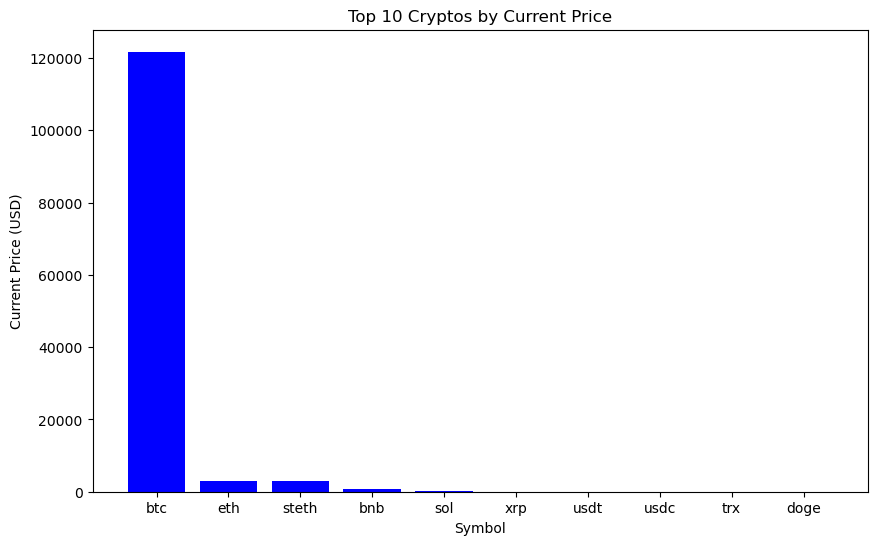

In [73]:
import matplotlib.pyplot as plt

top_n = 10
top_prices = price_comparison.head(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_prices['symbol'], top_prices['current_price'], color='blue')
plt.title('Top 10 Cryptos by Current Price')
plt.xlabel('Symbol')
plt.ylabel('Current Price (USD)')
plt.show()

In [74]:
# Add a new column showing percentage of current price compared to ATH
df['price_vs_ath_pct'] = (df['current_price'] / df['ath']) * 100

# Sort to find the ones closest to or farthest from ATH
comparison_to_ath = df[['symbol', 'name', 'current_price', 'ath', 'price_vs_ath_pct']].sort_values(by='price_vs_ath_pct', ascending=False)

print(comparison_to_ath.head(10))  # Currencies closest to ATH

  symbol               name  current_price            ath  price_vs_ath_pct
0    btc            Bitcoin  121764.000000  122838.000000         99.125678
4    bnb                BNB     704.130000     788.840000         89.261447
2    xrp                XRP       2.960000       3.400000         87.058824
6   usdc               USDC       0.999805       1.170000         85.453419
3   usdt             Tether       1.000000       1.320000         75.757576
8    trx               TRON       0.302849       0.431288         70.219668
9  steth  Lido Staked Ether    3042.330000    4829.570000         62.993807
1    eth           Ethereum    3046.580000    4878.260000         62.452186
5    sol             Solana     166.850000     293.310000         56.885207
7   doge           Dogecoin       0.205840       0.731578         28.136439


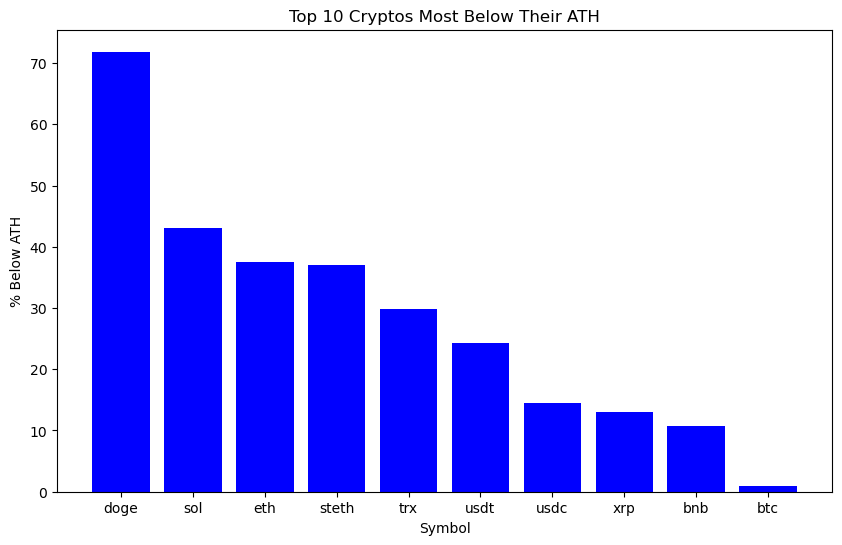

In [76]:
# Create a bar chart showing % below ATH
df['below_ath_pct'] = 100 - df['price_vs_ath_pct']
top_drops = df.sort_values(by='below_ath_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_drops['symbol'], top_drops['below_ath_pct'], color='blue')
plt.title('Top 10 Cryptos Most Below Their ATH')
plt.xlabel('Symbol')
plt.ylabel('% Below ATH')
plt.show()